<a href="https://colab.research.google.com/github/siddharthtumre/CV_Assignment2/blob/main/CV_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy

### Load the MNIST dataset

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


### Normalizing the data

In [3]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Sequential model

In [4]:
seq_model = keras.models.Sequential([
  keras.Input((28,28,1)),
  layers.Flatten(),
  layers.Dense(500, activation='relu'),
  layers.Dense(500, activation='relu'),
  layers.Dense(10, activation='softmax')
])

seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 10)                5010      
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [5]:
validation_split= 10000/x_train.shape[0]

In [6]:
epochs = 250

seq_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

seq_history = seq_model.fit(x_train, y_train, epochs=epochs, validation_split=validation_split)

Epoch 1/250
1563/1563 [==============================] - 11s 4ms/step - loss: 0.2011 - accuracy: 0.9394 - val_loss: 0.1156 - val_accuracy: 0.9659
Epoch 2/250
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0843 - accuracy: 0.9739 - val_loss: 0.0926 - val_accuracy: 0.9745
Epoch 3/250
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0593 - accuracy: 0.9810 - val_loss: 0.0852 - val_accuracy: 0.9754
Epoch 4/250
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0436 - accuracy: 0.9860 - val_loss: 0.0822 - val_accuracy: 0.9796
Epoch 5/250
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0356 - accuracy: 0.9890 - val_loss: 0.1199 - val_accuracy: 0.9716
Epoch 6/250
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0281 - accuracy: 0.9906 - val_loss: 0.0959 - val_accuracy: 0.9777
Epoch 7/250
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0261 - accuracy: 0.9915 - val_loss: 0.1009 - val_a

In [7]:
print(seq_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


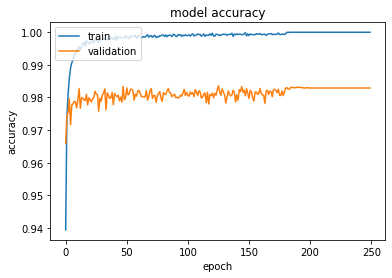

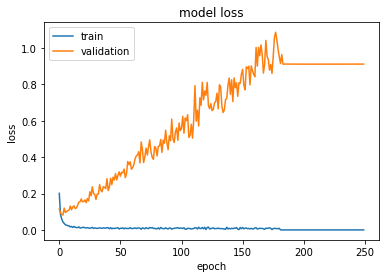

In [8]:
# summarize history for accuracy
plt.plot(seq_history.history['accuracy'])
plt.plot(seq_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(seq_history.history['loss'])
plt.plot(seq_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [9]:
score = seq_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.8020891547203064
Test accuracy: 0.9832000136375427


### L2 Regularization

In [10]:
l2_model = keras.models.Sequential([
  keras.Input((28,28,1)),
  layers.Flatten(),
  layers.Dense(500, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
  layers.Dense(500, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
  layers.Dense(10, activation='softmax')
])

l2_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 500)               392500    
                                                                 
 dense_4 (Dense)             (None, 500)               250500    
                                                                 
 dense_5 (Dense)             (None, 10)                5010      
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [11]:
validation_split= 10000/x_train.shape[0]

In [12]:
epochs = 250

l2_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

l2_history = l2_model.fit(x_train, y_train, epochs=epochs, validation_split=validation_split)

Epoch 1/250
1563/1563 [==============================] - 6s 3ms/step - loss: 0.9782 - accuracy: 0.8913 - val_loss: 0.4811 - val_accuracy: 0.9336
Epoch 2/250
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4700 - accuracy: 0.9264 - val_loss: 0.4417 - val_accuracy: 0.9310
Epoch 3/250
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4032 - accuracy: 0.9377 - val_loss: 0.3639 - val_accuracy: 0.9460
Epoch 4/250
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3684 - accuracy: 0.9430 - val_loss: 0.3302 - val_accuracy: 0.9546
Epoch 5/250
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3493 - accuracy: 0.9449 - val_loss: 0.3169 - val_accuracy: 0.9550
Epoch 6/250
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3386 - accuracy: 0.9462 - val_loss: 0.3226 - val_accuracy: 0.9482
Epoch 7/250
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3323 - accuracy: 0.9468 - val_loss: 0.3675 - val_ac

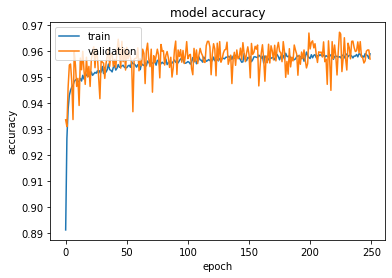

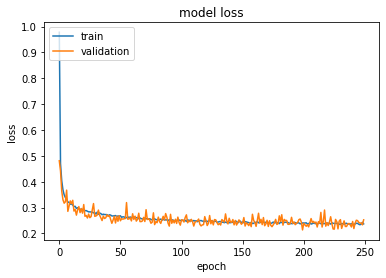

In [13]:
# summarize history for accuracy
plt.plot(l2_history.history['accuracy'])
plt.plot(l2_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(l2_history.history['loss'])
plt.plot(l2_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [14]:
score = l2_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2499399185180664
Test accuracy: 0.9534000158309937


### Dropout

In [15]:
dropout_model = keras.models.Sequential([
  keras.Input((28,28,1)),
  layers.Flatten(),
  layers.Dense(500, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(500, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(10, activation='softmax')
])

dropout_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 500)               392500    
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_7 (Dense)             (None, 500)               250500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                5010      
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-tr

In [16]:
epochs = 250

dropout_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

dropout_history = dropout_model.fit(x_train, y_train, epochs=epochs, validation_split=validation_split)

Epoch 1/250
1563/1563 [==============================] - 6s 3ms/step - loss: 0.3302 - accuracy: 0.8975 - val_loss: 0.1450 - val_accuracy: 0.9560
Epoch 2/250
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1846 - accuracy: 0.9446 - val_loss: 0.0980 - val_accuracy: 0.9716
Epoch 3/250
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1518 - accuracy: 0.9546 - val_loss: 0.0909 - val_accuracy: 0.9745
Epoch 4/250
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1364 - accuracy: 0.9583 - val_loss: 0.0884 - val_accuracy: 0.9748
Epoch 5/250
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1251 - accuracy: 0.9628 - val_loss: 0.0847 - val_accuracy: 0.9758
Epoch 6/250
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1144 - accuracy: 0.9662 - val_loss: 0.0870 - val_accuracy: 0.9773
Epoch 7/250
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1083 - accuracy: 0.9675 - val_loss: 0.0751 - val_ac

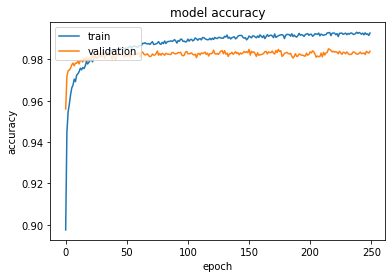

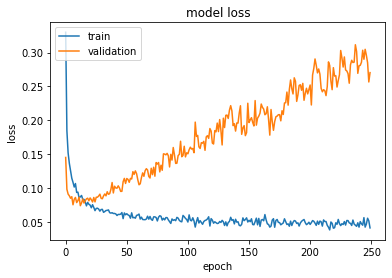

In [17]:
# summarize history for accuracy
plt.plot(dropout_history.history['accuracy'])
plt.plot(dropout_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(dropout_history.history['loss'])
plt.plot(dropout_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [18]:
score = dropout_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2655353546142578
Test accuracy: 0.982699990272522
